# 1. Spielzeugdatensatz
Laden Sie sich das Jupyter-Notebook ”Training eines MLPs auf MNIST” von der Vorlesungsseite
auf Moodle herunter, das den Numpy-Code für den Backpropagation-Algorithmus für
MLPs enthält. Statt auf MNIST werden wir zunächst ein einfacheres Perzeptron auf den
Spielzeugdaten aus der Vorlesung trainieren.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
%load_ext version_information

1. Erzeugen Sie 200 zweidimensionale Trainingsdatenpunkte mithilfe einer Gleichverteilung
über dem Gebiet [−6, 6]×[−6, 6]. Speichern Sie diese in einer 200×2 Designmatrix.

In [2]:
X1 = np.random.uniform(-6,6,200)
X2 = np.random.uniform(-6,6,200)
X = np.column_stack((X1,X2))
X.shape

(200, 2)

2. Die Klassenlabels 0 und 1 werden so vergeben, dass alle Datenpunkte im 1. und 3.
Quadranten das Label 1 und im 2. und 4. Quadranten das Label 0 erhalten. Speichern
Sie die Labels in einem Array.

In [3]:
x1 = X[:,0]<0
x2 = X[:,1]>0
x_q1 = x1*x2
y_q1 = x_q1*1

x3 = X[:,0]>0
x4 = X[:,1]<0
x_q3 = x3*x4
y_q3 = x_q3*1

y_ges = y_q1 + y_q3 
y_ges = np.array([y_ges]).T

X_train = X
y_train = y_ges

3. Erzeugen Sie einen gleich großen Testdatensatz nach demselben Prinzip. Stellen Sie
beide Datensätze zur Überprüfung als Scatterplot dar.

In [4]:
# Testmatrix erzeugen
X1 = np.random.uniform(-6,6,200)
X2 = np.random.uniform(-6,6,200)
X = np.column_stack((X1,X2))

# Klassenlabels entsprechend Quadrant vergeben
x1 = X[:,0]<0
x2 = X[:,1]>0
x_q1 = x1*x2
y_q1 = x_q1*1

x3 = X[:,0]>0
x4 = X[:,1]<0
x_q3 = x3*x4
y_q3 = x_q3*1 

y_ges = y_q1 + y_q3 
y_ges = np.array([y_ges]).T

X_test = X
y_test = y_ges

y_train_reshaped = np.reshape(y_train,(200,1))
y_test_reshaped = np.reshape(y_test,(200,1))

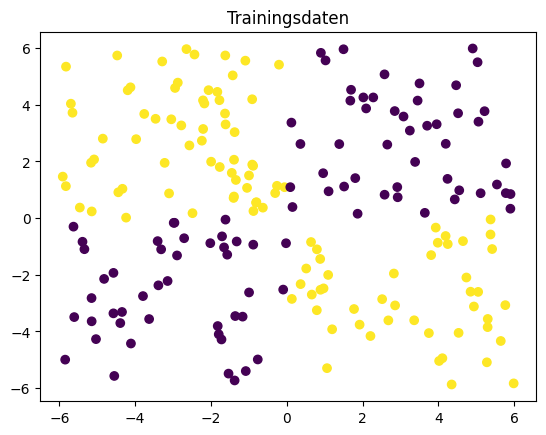

In [5]:
plt.title("Trainingsdaten")
plt.scatter(X_train[:,0], X_train[:,1],c=y_train)

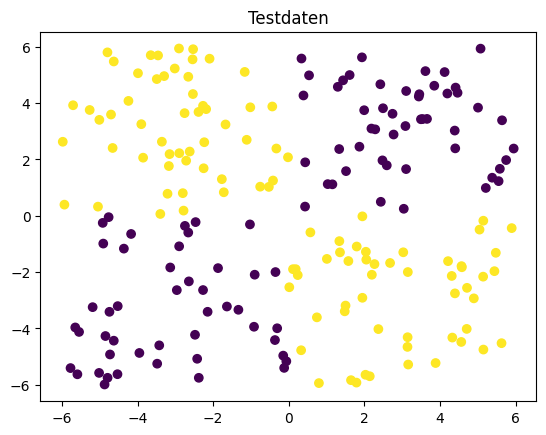

In [6]:
plt.title("Testdaten")
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)

4. Das in der Vorlesung dargestellte Experiment operiert nicht direkt auf den Inputdaten,
sondern auf 2 Merkmalen, die mithilfe zweier Neuronen mit fixem Gewichtsvektor
berechnet werden: ein Neuron teilt die Inputebene waagrecht entlang der x-Achse, das
andere senkrecht entlang der y-Achse. Wie muss der Gewichtsvektor für das jeweilige
Neuron aussehen?

In [7]:
# Zwei eindimensionale Eingangswerte: Der Gewichtsvektor hat die Form (2, 1).
w1 = np.array([1,0])
w2 = np.array([0,1])
print(np.array([w1, w2]))

[[1 0]
 [0 1]]


In [8]:

# Define the sigmoid activation function
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# Define tanh activation function
def tanh(z):
    return np.tanh(z)

global activationType
activationType = "sigmoid"

# Select the activation function
def activationFunction(z, type="sigmoid"):
    if type == "sigmoid":
        return sigmoid(z)
    elif type == "tanh":
        return tanh(z)

# Ableitung des Sigmoids
def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

# Ableitung des tanh
def tanh_prime(z):
    """Derivative of the tanh function."""
    return 1 - tanh(z)**2

# Select the derivative of the activation function
def activation_prime(z, type="sigmoid"):
    if type == "sigmoid":
        return sigmoid_prime(z)
    elif type == "tanh":
        return tanh_prime(z)

5. Berechnen Sie die Entscheidungsfunktion beider Neuron mit der im Beispielcode
angegebenen sigmoiden Aktivierungsfunktion auf einem 100 × 100-Gitter innerhalb
des Gebietes [−6, 6] × [−6, 6] und stellen Sie diese zur Überprüfung als Farbbild dar.

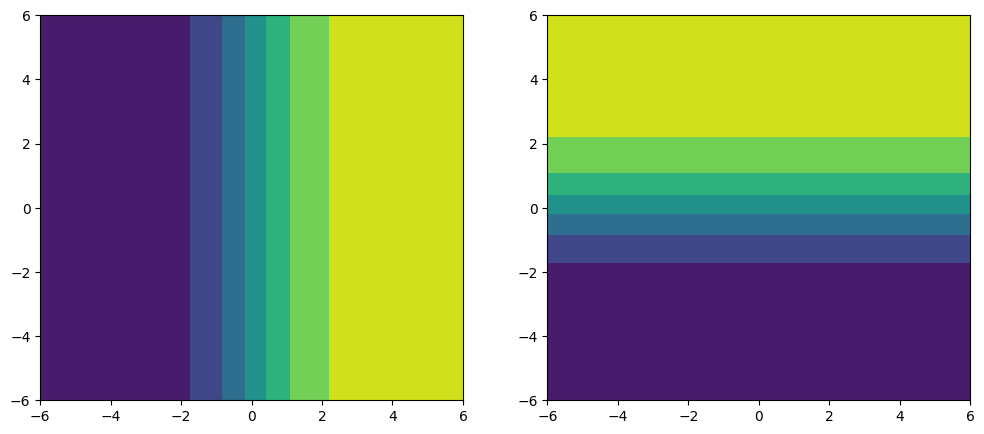

In [9]:
# Gitter erstellen
x_vals = np.linspace(-6, 6, 100)
y_vals = np.linspace(-6, 6, 100)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)

# Neuron 1: teilt die Inputebene waagrecht entlang der x-Achse
z_xx1 = x_grid
neuron1 = activationFunction(z_xx1,activationType)

# Neuron 2: teilt die Inputebene senkrecht entlang der y-Achse
z_xx2 = y_grid
neuron2 = activationFunction(z_xx2,activationType)

# Darstellung der Ergebnisse als Farbbilder
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(x_grid, y_grid, neuron1)

plt.subplot(1, 2, 2)
plt.contourf(x_grid, y_grid, neuron2)

plt.show()

6. Da die Eingangsneuronen nicht mittrainiert werden, können wir deren Output schon
im Vorfeld berechnen. Erzeugen Sie dazu neue Designmatritzen für den Trainings und
Testdatensatz, so dass die erste Spalte den Output des ersten Neurons und die
zweite Spalte den Output des zweiten Neurons enthält. Erzeugen Sie auch eine entsprechende
Designmatrix für Ihr 100 × 100-Gitter, das wir später zu Darstellungszwecken
brauchen werden. Wichtig: arbeiten Sie im Folgenden nur mit diesen transformierten
Designmatritzen, um korrekte Ergebnisse zu erhalten!

In [10]:
def BerechneNeuronenOutput(w, X):
    return sigmoid(np.dot(X, w.T))

train_design_matrix = np.zeros((len(X_train), 2))
for index, x in enumerate(X_train):
    train_design_matrix[index, 0] = BerechneNeuronenOutput(w1, x)
    train_design_matrix[index, 1] = BerechneNeuronenOutput(w2, x)
print('Size of Train Data Layer 1: ', train_design_matrix.shape)

test_design_matrix = np.zeros((len(X_test), 2))
for index, x in enumerate(X_test):
    test_design_matrix[index, 0] = BerechneNeuronenOutput(w1, x)
    test_design_matrix[index, 1] = BerechneNeuronenOutput(w2, x)
print('Size of Test Data Layer 1: ', test_design_matrix.shape)

grid_design_matrix = np.zeros((2, 100*100))
step = 12/100
index = 0
for x in np.arange(-6, 6, step):
    for y in np.arange(-6, 6, step):
        input = np.array([x, y])
        grid_design_matrix[0, index] = BerechneNeuronenOutput(w1, input)
        grid_design_matrix[1, index] = BerechneNeuronenOutput(w2, input)
        index += 1
print('Size of Grid Matrix: ', grid_design_matrix.shape)

Size of Train Data Layer 1:  (200, 2)
Size of Test Data Layer 1:  (200, 2)
Size of Grid Matrix:  (2, 10000)


# 2. Training eines MLPs auf den Spielzeugdaten
Der Code aus dem Beispielnotebook muss zunächst an das Szenario aus der Vorlesung angepasst
werden: ein deutlich kleineres Netzwerk mit eindimensionalem statt zehndimensionalem
Output.

1. Setzen Sie im Code die Größe der Minibatches auf 10, die Anzahl der Epochen
auf 150 und die Lernrate auf 0.03. Ändern Sie die Netzarchitektur so ab, dass sie 2
Eingangsneuronen, 2 verdeckte Schichten mit jeweils 2 Neuronen und 1 Ausgangsneuron
haben. Überprüfen Sie die Größen der sich daraus ergebenden Gewichtsmatritzen auf
Korrektheit.

In [11]:
# Netzwerkparameter
def setNetworkParams(miniBatchSize, learningRate, networkSizeArray, numberOfEpochs):
    global mbs, eta, sizes, epochs, biases, weights, num_layers
    mbs = miniBatchSize                   # Größe der Minibatches
    eta = learningRate                  # Lernrate
    # Die erste eigentliche Input Schicht enfällt das diese mit festen Gewichten verbunden ist
    sizes = networkSizeArray         # Anzahl Neuronen pro Schicht (Input, Hidden, Output)
    num_layers = len(sizes)     # Anzahl Schichten
    epochs = numberOfEpochs               # Anzahl Epochen
    # Arrays für Gewichte und Schwellwerte (initialisiert mit Gaußschem Rauschen)
    biases = [np.random.randn(y, 1) for y in sizes[1:]] # Schwellwerte
    weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] #Gewichte
    print(weights[1].shape)

global lossFunctionType
lossFunctionType = "mse"

# Netzwerkparameter setzen
setNetworkParams(10, 0.03, [2, 2, 1], 150)

(1, 2)


2. Der Beispielcode verwendet One-Hot-Coding für die Labels, in unserem Beispiel sind
die Klassenzugehörigkeiten aber durch die Klassenindizes 0 und 1 codiert. Wir müssen
daher die Funktion evaluate() im Code so abändern, dass ein Beispiel als korrekt
klassifiziert gilt, wenn bei Klasse 0 der MLP-Output kleiner als 0.5 ist und bei Klasse 1
größer als 0.5. Berechnen Sie zusätzlich den MSE in dieser Funktion bei jedem Aufruf
uns speichern Sie diesen in einem zusätzlichen Array ab.

In [12]:
def feedforward(a):
    """Return the output of the network if ``a`` is input."""
    for b, w in zip(biases, weights):
        a = activationFunction(np.dot(w, a)+b, activationType)
    return a

def evaluate(x2, y2):
    """Return the number of test inputs for which the neural
    network outputs the correct result and calculate the Mean Squared Error (MSE)."""
    
    correct = 0 # Anzahl korrekt klassifizierter Testbeispiele
    loss = []     # loss by MSE or logistic regression
    
    # Gehe den Testdatensatz durch
    for i in range(0, x2.shape[0]):
        x = np.reshape(x2[i,:],(x2.shape[1],1)).copy()
        if len(y2.shape) == 2:
            y = np.reshape(y2[i,:],(y2.shape[1],1)).copy()
        else:
            y = y2[i].copy()
        
        # Vorwärtslauf
        ypred = feedforward(x)
        
        ## Label ist in one-hot-Codierung (Index der Testdaten = Klassenzugehörigkeit): korrekte Klasse ist 1, alle anderen 0
        #c = np.argmax(y)
        #
        ## Index des maximal aktivierten Outputs ist die Entscheidung des Netzwerk
        #cpred = np.argmax(ypred)
        #
        ## Falls beide übereinstimmen, addiere zur Gesamtzahl
        #if c == cpred:
        #    correct += 1

        if(activationType == "sigmoid"):
            # Klassifizierung auf Basis des MLP Wahrschenlichkeitsoutputs bei sigmoid Aktivierung
            if np.all(y == 0) and np.all(ypred < 0.5):
                correct += 1
            elif np.all(y == 1) and np.all(ypred >= 0.5):
                correct += 1
        elif(activationType == "tanh"):
            # Klassifizierung auf Basis des MLP Wahrscheinlichkeitsoutputs bei tanh Aktivierung
            if np.all(y == 0) and np.all(ypred < 0):
                correct += 1
            elif np.all(y == 1) and np.all(ypred >= 0):
                correct += 1

        if lossFunctionType == "mse":
            # Berechnung Squared Error
            loss.append((y - ypred)**2)
        elif lossFunctionType == "log":
            # Calculate logistic regression loss
            loss.append(-y * np.log(np.nan_to_num(ypred)) - (1 - y) * np.log(np.nan_to_num(1 - ypred)))

    loss = np.mean(loss)

    return correct, loss

In [13]:
# Ableitung der MSE-Kostenfunktion
def cost_derivative(output_activations, y, lossFunctionType="mse"):
    #Return the vector of partial derivatives \partial C_x /partial a for the output activations.
    if lossFunctionType == "mse":
        return (output_activations-y)
    # Return the vector of partial derivatives ∇aC for the output activations.
    elif lossFunctionType == "log":
        return (output_activations - y) / (output_activations * (1 - output_activations))

In [14]:
def backprop(x, y):
    """Return a tuple ``(nabla_b, nabla_w)`` representing the
    gradient for the cost function C_x.  ``nabla_b`` and
    ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
    to ``self.biases`` and ``self.weights``."""
    
    # Initialisiere Updates für Schwellwerte und Gewichte
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    
    # Vorwärtslauf
    activation = x # Initialisierung a^1 = x
    activations = [x] # list to store all the activations, layer by layer
    zs = [] # list to store all the z vectors, layer by layer
    for b, w in zip(biases, weights):
        z = np.dot(w, activation) + b # z=w*x+b
        zs.append(z)
        activation = activationFunction(z,activationType)     # Sigmoide Aktivierungsfunktion
        activations.append(activation)
    
    # Rückwärtslauf
    delta = cost_derivative(activations[-1], y, lossFunctionType) * activation_prime(zs[-1], activationType) # Fehler am Output
    nabla_b[-1] = delta # Update Schwellwert in der Ausgangsschicht
    # !!! Deshalb effizient: Gewichte eines Layers werden gleichzeitig aktualisiert durch Matrixmultiplikation
    nabla_w[-1] = np.dot(delta, activations[-2].transpose()) # Update Gewichte in der Ausgangsschicht
    for l in range(2, num_layers): # Backpropagation
        z = zs[-l] # gewichteter Input
        sp = activation_prime(z, activationType) # Ableitung der Aktivierungsfunktion
        delta = np.dot(weights[-l+1].transpose(), delta) * sp # Fehler in Schicht l
        nabla_b[-l] = delta # Update Schwellwert 
        nabla_w[-l] = np.dot(delta, activations[-l-1].transpose()) # Update Gewichte

    return (nabla_b, nabla_w)

In [15]:
def update_mini_batch(xmb, ymb, eta):
    """Update the network's weights and biases by applying
    gradient descent using backpropagation to a single mini batch.
    The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
    is the learning rate."""
    global weights
    global biases

    # Initialisiere Updates für Schwellwerte und Gewichte
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    
    # Gehe durch alle Beispielpaare im Minibatch
    for i in range(xmb.shape[0]):
        x = np.reshape(xmb[i,:],(xmb.shape[1],1)).copy()
        if len(ymb.shape) == 2:
            y = np.reshape(ymb[i,:],(ymb.shape[1],1)).copy()
        else:
            y = ymb[i].copy()
        
        # Berechne Updates für alle Schichten über Backprop
        delta_nabla_b, delta_nabla_w = backprop(x, y)
        
        # Addiere einzelne Updates auf (alter Wert + Delta (Fehler))
        nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
        nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
    
    # Berechne neue Gewichte
    weights = [w-(eta/xmb.shape[0])*nw for w, nw in zip(weights, nabla_w)]
    biases = [b-(eta/xmb.shape[0])*nb for b, nb in zip(biases, nabla_b)]
    
    return (weights, biases)

In [16]:
def SGD(x0, y0, epochs, mini_batch_size, eta, x2, y2):

    n_test = x2.shape[0] # Anzahl Testdaten
    n = x0.shape[0]      # Anzahl Trainingsdaten
    
    # gehe durch alle Epochen
    acc_val = np.zeros(epochs)
    mse = np.zeros(epochs)
    
    for j in range(epochs):
        
        # Bringe die Trainingsdaten in eine zufällige Reihenfolge für jede Epoche
        p = np.random.permutation(n) # Zufällige Permutation aller Indizes von 0 .. n-1
        x0 = x0[p,:]
        y0 = y0[p]
        
        # Zerlege den permutierten Datensatz in Minibatches 
        for k in range(0, n, mini_batch_size):
            xmb = x0[k:k+mini_batch_size,:]
            if len(y0.shape) == 2:
                ymb = y0[k:k+mini_batch_size,:]
            else:
                ymb = y0[k:k+mini_batch_size]
            update_mini_batch(xmb, ymb, eta)
        
        # Gib Performance aus
        acc_val[j], mse[j] = evaluate(x2, y2)
        print("Epoch {0}: {1} / {2} -- {3}".format(j, acc_val[j], n_test, mse[j]))
    
    return acc_val, mse

In [17]:
# Darstellung
def ShowResult(acc_val, mse, test_design_matrix, grid_design_matrix, X_train, y_train):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    # Lernkurve der Genauigkeit darstellen
    plt.plot(acc_val / test_design_matrix.shape[0])
    plt.title("Genauigkeit")

    plt.subplot(1, 3, 2)
    # Lernkurve des MSE darstellen
    plt.plot(mse / test_design_matrix.shape[0])
    plt.title("MSE")

    plt.show()

    # Get predictions for each point in the meshgrid
    predictions = feedforward(grid_design_matrix)

    # Reshape predictions to match the shape of the meshgrid
    predictions = predictions.reshape(100,100)

    plt.figure(figsize=(30, 5))
    plt.subplot(1, 3, 3)
    # Plot the decision boundary using imshow
    plt.imshow(predictions, extent=(-6, 6, -6, 6), origin='lower', cmap='viridis')

    # Add scatter plot of training data points if available
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o')

    plt.title('Neural Network Decision Boundaries')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.colorbar(label='Activation')
    plt.show()

3. Trainieren Sie Ihr Netz mit den Trainingsdaten als Validierungsdaten und testen Sie es
auf Ihren Testdaten. Stellen Sie die Lernkurven für Genauigkeit und MSE als Plots dar.
Beachten Sie hierbei, dass unser Lernproblem nicht konvex ist, so dass die Optimierung
zuweilen in lokalen Minima hängenbleiben kann. Wiederholen Sie Ihren Versuch daher
mehrere Male und vergeleichen Sie die Ergebnisse.

In [18]:
# Netz trainieren
activationType = "sigmoid"
lossFunctionType="mse"
setNetworkParams(10, 0.03, [2,2,1], 150)
acc_val, mse = SGD(train_design_matrix, y_train_reshaped, epochs, mbs, eta, test_design_matrix, y_test_reshaped)

(1, 2)
Epoch 0: 107.0 / 200 -- 0.24954599938337504
Epoch 1: 107.0 / 200 -- 0.24938749688603637
Epoch 2: 109.0 / 200 -- 0.2492518494823067
Epoch 3: 108.0 / 200 -- 0.2491293878072544
Epoch 4: 109.0 / 200 -- 0.2490269830509594
Epoch 5: 109.0 / 200 -- 0.24893846755355958


Epoch 6: 106.0 / 200 -- 0.2488604640460722
Epoch 7: 104.0 / 200 -- 0.2487949057069428
Epoch 8: 99.0 / 200 -- 0.24874015617866013
Epoch 9: 100.0 / 200 -- 0.24869387412484367
Epoch 10: 102.0 / 200 -- 0.2486542489945878
Epoch 11: 102.0 / 200 -- 0.24862280546619878
Epoch 12: 104.0 / 200 -- 0.24859552932533077
Epoch 13: 103.0 / 200 -- 0.24857346297053
Epoch 14: 99.0 / 200 -- 0.24855522167043254
Epoch 15: 99.0 / 200 -- 0.2485412519068104
Epoch 16: 99.0 / 200 -- 0.24853062529776046
Epoch 17: 99.0 / 200 -- 0.24852315932332317
Epoch 18: 97.0 / 200 -- 0.2485181902916527
Epoch 19: 96.0 / 200 -- 0.24851515409704955
Epoch 20: 95.0 / 200 -- 0.24851391458914895
Epoch 21: 92.0 / 200 -- 0.24851422413670526
Epoch 22: 91.0 / 200 -- 0.24851571308079032
Epoch 23: 85.0 / 200 -- 0.24851824605427
Epoch 24: 78.0 / 200 -- 0.24852189729810553
Epoch 25: 77.0 / 200 -- 0.24852567207201326
Epoch 26: 75.0 / 200 -- 0.24853063666473799
Epoch 27: 74.0 / 200 -- 0.24853599026592105
Epoch 28: 77.0 / 200 -- 0.24854085699577

4. Berechnen Sie die Entscheidungsfunktion Ihres MLPs für Ihr 100 × 100-Gitter und
stellen Sie diese gemeinsam mit dem Scatterplot Ihrer Trainingsdaten dar.

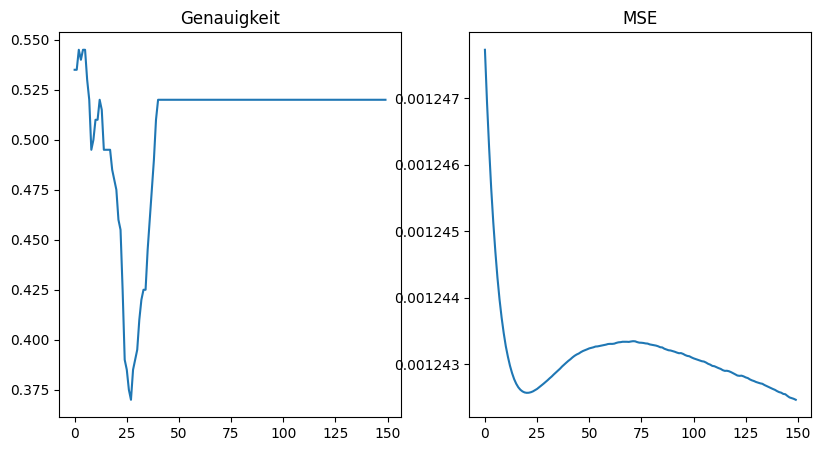

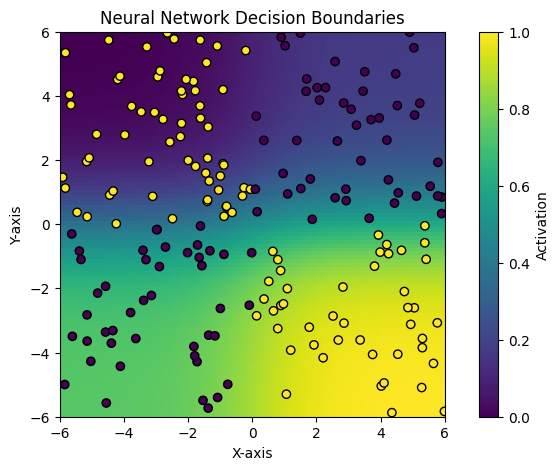

In [19]:
ShowResult(acc_val, mse, test_design_matrix, grid_design_matrix, X_train, y_train)

# 3. Nachvollziehen der Beispiele aus der Vorlesung

Das Netz aus der Vorlesung verwendet als Aktivierungsfunktion den Tangens hyperbolicus
(np.tanh()). Passen Sie die Funktionen sigmoid() und sigmoid_prime() entsprechend
an. Achtung: kommentieren Sie den bisherigen Code für die Sigmoidfunktion nur aus, wir
werden ihn in der nächsten Aufgabe nochmals benötigen. Da die Ausgangswerte von tanh
im Intervall [−1, 1] statt [0, 1] liegen, müssen wir hierfür nochmals die Funktion evaluate()
entsprechend anpassen. Vollziehen Sie die 3 Beispiele aus der Vorlesung nach.

(1, 2)
Epoch 0: 104.0 / 200 -- 0.2519418744172352
Epoch 1: 104.0 / 200 -- 0.25194554677288095
Epoch 2: 104.0 / 200 -- 0.2519488447034191
Epoch 3: 104.0 / 200 -- 0.2519545837776632
Epoch 4: 104.0 / 200 -- 0.2519603224797488
Epoch 5: 104.0 / 200 -- 0.2519664415438085
Epoch 6: 104.0 / 200 -- 0.2519730158728643
Epoch 7: 104.0 / 200 -- 0.2519802627994326
Epoch 8: 104.0 / 200 -- 0.2519870124346729
Epoch 9: 104.0 / 200 -- 0.25199216405403996
Epoch 10: 104.0 / 200 -- 0.25199928717966386
Epoch 11: 104.0 / 200 -- 0.25200346567807963
Epoch 12: 104.0 / 200 -- 0.25200719858888604
Epoch 13: 104.0 / 200 -- 0.2520119993352123
Epoch 14: 104.0 / 200 -- 0.2520172393008606
Epoch 15: 104.0 / 200 -- 0.2520225287196167
Epoch 16: 104.0 / 200 -- 0.25202576387555037
Epoch 17: 104.0 / 200 -- 0.25202840242678803
Epoch 18: 104.0 / 200 -- 0.252029928654047
Epoch 19: 104.0 / 200 -- 0.25203078746298585
Epoch 20: 104.0 / 200 -- 0.2520342043707376
Epoch 21: 104.0 / 200 -- 0.25203643861477654
Epoch 22: 104.0 / 200 -- 0.

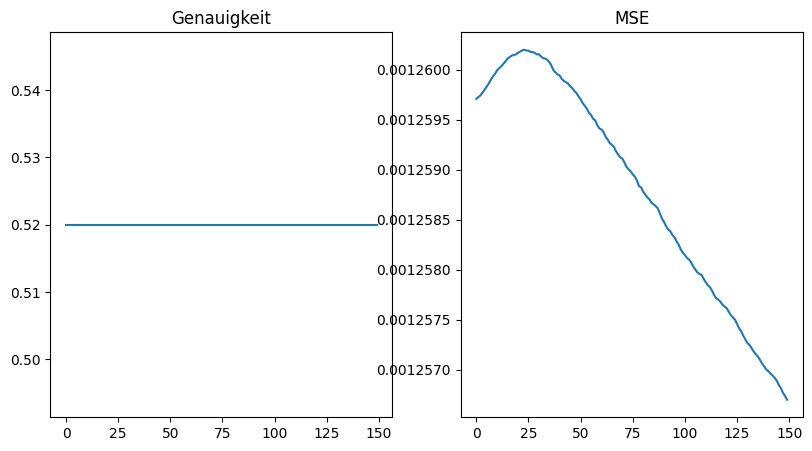

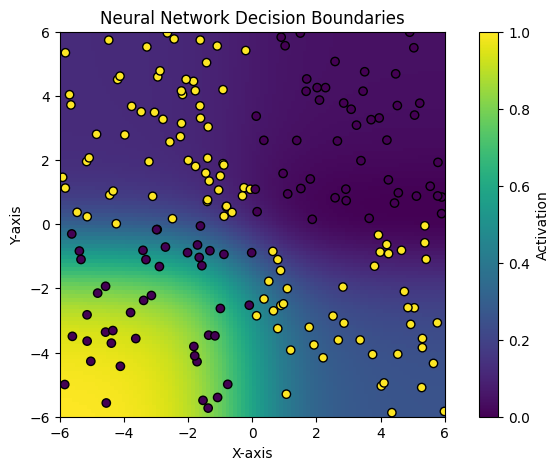

In [20]:
activationType = "sigmoid"
lossFunctionType="mse"
setNetworkParams(10, 0.03, [2,2,1], 150)
acc_val, mse = SGD(train_design_matrix, y_train_reshaped, epochs, mbs, eta, test_design_matrix, y_test_reshaped)
ShowResult(acc_val, mse, test_design_matrix, grid_design_matrix, X_train, y_train)

(1, 3)
Epoch 0: 140.0 / 200 -- 1.443165098054074
Epoch 1: 136.0 / 200 -- 1.2721259042849347
Epoch 2: 107.0 / 200 -- 1.1846115787803588
Epoch 3: 93.0 / 200 -- 1.0860494814732364
Epoch 4: 81.0 / 200 -- 0.9327342054543086
Epoch 5: 60.0 / 200 -- 0.6809173328430844
Epoch 6: 71.0 / 200 -- 0.45324419363380675
Epoch 7: 104.0 / 200 -- 0.3613808926198218
Epoch 8: 104.0 / 200 -- 0.31584197255171415
Epoch 9: 104.0 / 200 -- 0.28278898993770796
Epoch 10: 104.0 / 200 -- 0.25562807117306713
Epoch 11: 104.0 / 200 -- 0.23327297463335056
Epoch 12: 104.0 / 200 -- 0.21549923886250638
Epoch 13: 104.0 / 200 -- 0.20113797904930664
Epoch 14: 104.0 / 200 -- 0.18999253516119174
Epoch 15: 104.0 / 200 -- 0.18100330918911886
Epoch 16: 113.0 / 200 -- 0.17323859988381185
Epoch 17: 115.0 / 200 -- 0.16675664114900646
Epoch 18: 118.0 / 200 -- 0.16115125595173743
Epoch 19: 117.0 / 200 -- 0.15618074614628674
Epoch 20: 118.0 / 200 -- 0.1517386342811479
Epoch 21: 118.0 / 200 -- 0.14773340301480747
Epoch 22: 118.0 / 200 -- 0

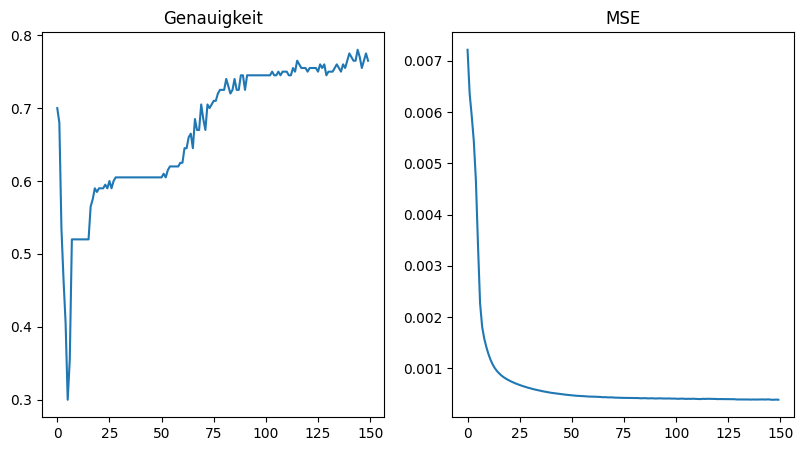

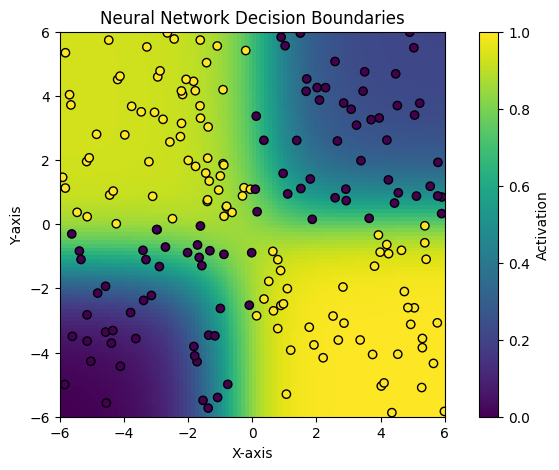

In [21]:
activationType = "tanh"
lossFunctionType="mse"
setNetworkParams(10, 0.03, [2,3,1], 150)
acc_val, mse = SGD(train_design_matrix, y_train_reshaped, epochs, mbs, eta, test_design_matrix, y_test_reshaped)
ShowResult(acc_val, mse, test_design_matrix, grid_design_matrix, X_train, y_train)

(1, 2)
Epoch 0: 97.0 / 200 -- 0.6555589472211096
Epoch 1: 81.0 / 200 -- 0.39763925516415566
Epoch 2: 104.0 / 200 -- 0.32897113117805643
Epoch 3: 104.0 / 200 -- 0.29872057135786095
Epoch 4: 104.0 / 200 -- 0.2784582148531083
Epoch 5: 104.0 / 200 -- 0.26171553463401775
Epoch 6: 104.0 / 200 -- 0.24807252024959112
Epoch 7: 104.0 / 200 -- 0.23708977032655562
Epoch 8: 104.0 / 200 -- 0.2281809960110966
Epoch 9: 104.0 / 200 -- 0.22148861579593088
Epoch 10: 104.0 / 200 -- 0.21693492244006954
Epoch 11: 104.0 / 200 -- 0.212607548882172
Epoch 12: 104.0 / 200 -- 0.20940404256944445
Epoch 13: 104.0 / 200 -- 0.2071787753289705
Epoch 14: 104.0 / 200 -- 0.20450225257167418
Epoch 15: 104.0 / 200 -- 0.20229247001462952
Epoch 16: 104.0 / 200 -- 0.20107779576680965
Epoch 17: 104.0 / 200 -- 0.19918890471018486
Epoch 18: 104.0 / 200 -- 0.19734344255894612
Epoch 19: 104.0 / 200 -- 0.19572589559769546
Epoch 20: 104.0 / 200 -- 0.1936528150438744
Epoch 21: 104.0 / 200 -- 0.19187707182465313
Epoch 22: 104.0 / 200 

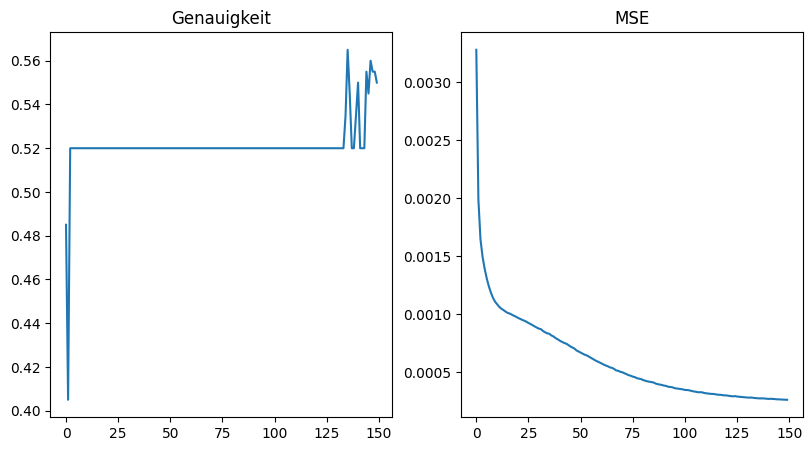

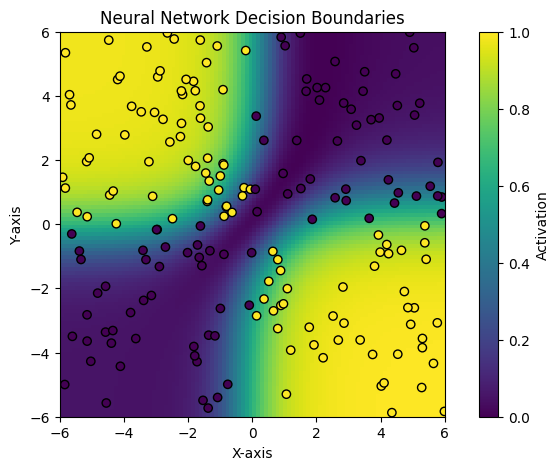

In [22]:
activationType = "tanh"
lossFunctionType="mse"
setNetworkParams(10, 0.03, [2, 2, 1], 150)
acc_val, mse = SGD(train_design_matrix, y_train_reshaped, epochs, mbs, eta, test_design_matrix, y_test_reshaped)
ShowResult(acc_val, mse, test_design_matrix, grid_design_matrix, X_train, y_train)

# 4. Logistische Regression

(1, 2)
Epoch 0: 92.0 / 200 -- 0.7423747528389291
Epoch 1: 93.0 / 200 -- 0.7345443494260983
Epoch 2: 96.0 / 200 -- 0.7301242679877893
Epoch 3: 97.0 / 200 -- 0.7272862817904149
Epoch 4: 99.0 / 200 -- 0.7251918061056358
Epoch 5: 101.0 / 200 -- 0.7235551509228957
Epoch 6: 102.0 / 200 -- 0.7221161588936273
Epoch 7: 102.0 / 200 -- 0.7207258845886864
Epoch 8: 102.0 / 200 -- 0.7194374212931613
Epoch 9: 103.0 / 200 -- 0.7181084686213478
Epoch 10: 104.0 / 200 -- 0.7168379603664461
Epoch 11: 104.0 / 200 -- 0.7155840486752738
Epoch 12: 105.0 / 200 -- 0.7143637550882782
Epoch 13: 105.0 / 200 -- 0.7129973122295769
Epoch 14: 105.0 / 200 -- 0.7117141220020806
Epoch 15: 106.0 / 200 -- 0.7104864004035772
Epoch 16: 108.0 / 200 -- 0.7091966139823334
Epoch 17: 108.0 / 200 -- 0.7080006852353773
Epoch 18: 108.0 / 200 -- 0.7067958584279055
Epoch 19: 109.0 / 200 -- 0.7055768416029496
Epoch 20: 109.0 / 200 -- 0.7043733998940127
Epoch 21: 112.0 / 200 -- 0.7032575745803906
Epoch 22: 115.0 / 200 -- 0.7021352294415

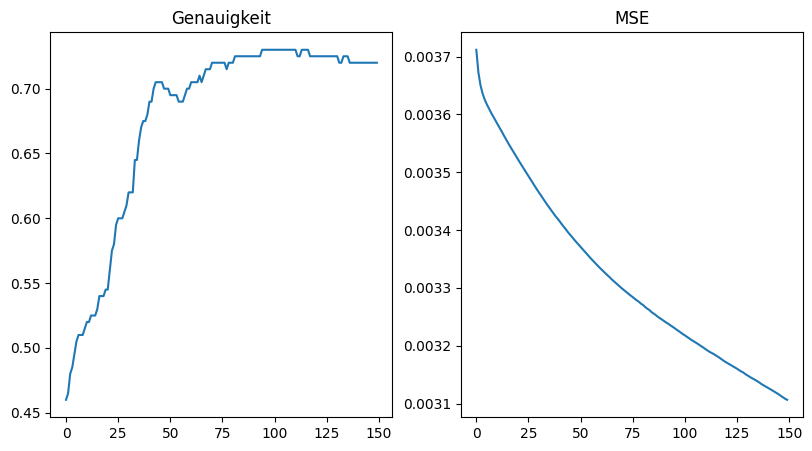

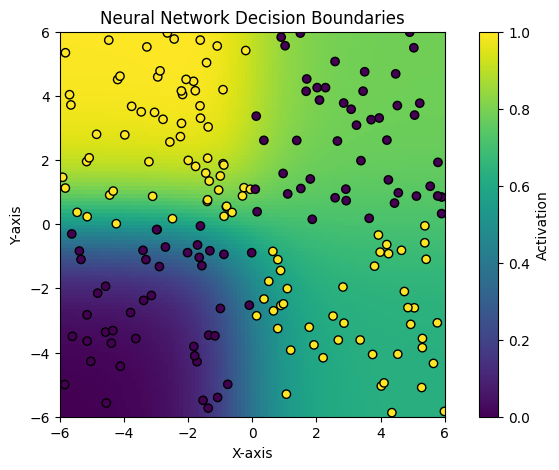

In [23]:
activationType = "sigmoid"
lossFunctionType = "log"
setNetworkParams(10, 0.03, [2, 2, 1], 150)
acc_val, mse = SGD(train_design_matrix, y_train_reshaped, epochs, mbs, eta, test_design_matrix, y_test_reshaped)
ShowResult(acc_val, mse, test_design_matrix, grid_design_matrix, X_train, y_train)

In [24]:
%version_information

Software versions
Python 3.12.0 64bit [MSC v.1935 64 bit (AMD64)]
IPython 8.16.1
OS Windows 10 10.0.19045 SP0
Sun Dec 17 16:33:31 2023 Mitteleuropäische Zeit